<a href="https://colab.research.google.com/github/mohamedabdelaty74/amit/blob/main/Graduation_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset link

https://www.kaggle.com/datasets/kaggle/sf-salaries

# Q1:  What is the average BasePay across all job titles?

# PYTHON CODE

In [1]:
import pandas as pd

sal= pd.read_csv("Salaries.csv")

sal['BasePay'] = pd.to_numeric(sal['BasePay'], errors='coerce')
sal['BasePay'].mean()



<ipython-input-1-391a5bbcabe8>:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal= pd.read_csv("Salaries.csv")


66325.4488404877

In [ ]:
sal.dropna(inplace=True)


# sql code

In [ ]:
DELETE FROM Salaries
WHERE BasePay = '';

SELECT avg (BasePay) From Salaries


# Q2: Which job title has the highest BasePay?


# PYTHON CODE

In [ ]:
highest_basepay_job = sal.loc[sal['BasePay'].idxmax()]
print(highest_basepay_job['JobTitle'])
print(highest_basepay_job['BasePay'])


Chief of Police
319275.01


# sql code

In [ ]:
SELECT max(Basepay) FROM Salaries


# Q3: How many unique job titles are there in the dataset?


# PYTHON CODE

In [ ]:
unique_job_title=sal['JobTitle'].nunique()
print(unique_job_title)

2159


# sql code

In [ ]:
SELECT COUNT(DISTINCT JobTitle)
FROM salaries;

#### Q4: What is the total OvertimePay for each year?


# PYTHON CODE

In [3]:
sal['OvertimePay']=pd.to_numeric(sal['OvertimePay'],errors='coerce')
total_overtime_by_year = sal.groupby('Year')['OvertimePay'].sum()
total_overtime_by_year


Year
2011    1.638388e+08
2012    1.846910e+08
2013    1.986214e+08
2014    2.059186e+08
Name: OvertimePay, dtype: float64

# sql code

In [ ]:
select Year, sum(OvertimePay) from Salaries
GROUP BY Year

#### Q5: Which year had the highest average OtherPay?


# PYTHON CODE

In [17]:
sal['OtherPay']=pd.to_numeric(sal['OtherPay'], errors='coerce')
sal.groupby('Year')['OtherPay'].mean().idxmax()



2013

# sql code

In [ ]:
SELECT Year, AVG(OtherPay) AS AverageOtherPay
FROM salaries
GROUP BY Year
ORDER BY AverageOtherPay DESC
LIMIT 1;

#### Q6: What is the median TotalPay for each job title?


# PYTHON CODE

In [ ]:
median_totalpay_by_jobtitle = sal.groupby('JobTitle')['TotalPay'].median()
print(median_totalpay_by_jobtitle)

JobTitle
ACCOUNT CLERK                                     49777.820
ACCOUNTANT                                        60076.240
ACCOUNTANT INTERN                                 17658.505
ACPO,JuvP, Juv Prob (SFERS)                       62290.780
ACUPUNCTURIST                                     67594.400
                                                    ...    
X-RAY LABORATORY AIDE                             60333.125
X-Ray Laboratory Aide                             60047.290
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870
Youth Comm Advisor                                44449.895
ZOO CURATOR                                       66686.560
Name: TotalPay, Length: 2159, dtype: float64


# sql code

In [ ]:
SELECT JobTitle, AVG(TotalPay) AS median_TotalPay
FROM (
    SELECT TotalPay, JobTitle,
           ROW_NUMBER() OVER (PARTITION BY JobTitle ORDER BY TotalPay) AS RowAsc,
           ROW_NUMBER() OVER (PARTITION BY JobTitle ORDER BY TotalPay DESC) AS RowDesc
    FROM Salaries
) AS OrderedData
WHERE RowAsc IN (RowDesc, RowDesc + 1, RowDesc - 1)
GROUP BY JobTitle


#### Q7: How many employees are there in each agency?


# PYTHON CODE

In [18]:
employee_count_per_agency = sal.groupby('Agency')['Agency'].value_counts()
print(employee_count_per_agency)

Agency
San Francisco    148654
Name: count, dtype: int64


# sql code

In [ ]:
SELECT agency, COUNT(id)
FROM Salaries

#### Q8: What is the maximum Benefits offered by any agency?


# PYTHON CODE

In [33]:
sal['Benefits'] = pd.to_numeric(sal['Benefits'], errors='coerce')
max_benefits = sal['Benefits'].max()
max_benefits_agency = sal.loc[sal['Benefits'] == max_benefits, 'Agency']

print(max_benefits)
print(max_benefits_agency)

96570.66
110533    San Francisco
Name: Agency, dtype: object


In [21]:
sal['Benefits'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Benefits, dtype: float64

# sql code

In [ ]:
DELETE FROM Salaries
WHERE Benefits = '';
select Agency, max(benefits) from Salaries

#### Q9: What is the total BasePay, OvertimePay, and OtherPay for each employee?


# PYTHON CODE

In [ ]:
sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [ ]:
comparison_result = sal['TotalPay'] == (sal['BasePay'] + sal['OvertimePay'] + sal['OtherPay'])
true_count = comparison_result.sum()
false_count = len(comparison_result) - true_count
print("True:", true_count)
print("False:", false_count)

True: 120934
False: 27720


In [ ]:
sal['tot'] = sal['BasePay'] + sal['OvertimePay'] + sal['OtherPay']
print(sal[['EmployeeName', 'tot']])


             EmployeeName        tot
0          NATHANIEL FORD  567595.43
1            GARY JIMENEZ  538909.28
2          ALBERT PARDINI  335279.91
3       CHRISTOPHER CHONG  332343.61
4         PATRICK GARDNER  326373.19
...                   ...        ...
148649      Roy I Tillery       0.00
148650       Not provided        NaN
148651       Not provided        NaN
148652       Not provided        NaN
148653          Joe Lopez    -618.13

[148654 rows x 2 columns]


# sql code

In [ ]:
select EmployeeName , sum(BasePay), sum(OvertimePay), sum(OtherPay)
from Salaries
group by id

#### Q10: Which employee has the highest TotalPayBenefits?


# PYTHON CODE

In [ ]:
sal['TotalPayBenefits'] = pd.to_numeric(sal['TotalPayBenefits'], errors='coerce')
highest_paid_employee = sal.loc[sal['TotalPayBenefits'].idxmax()]['EmployeeName']
print(highest_paid_employee,sal['TotalPayBenefits'].max())

NATHANIEL FORD 567595.43


# sql code

In [ ]:
SELECT EmployeeName, TotalPayBenefits
FROM Salaries
ORDER BY TotalPayBenefits DESC
LIMIT 1;

#### Q11: How does the average TotalPayBenefits vary across years?


# PYTHON CODE

In [ ]:
average_pay_by_year = sal.groupby('Year')['TotalPayBenefits'].mean().reset_index()
average_pay_by_year

,Year,TotalPayBenefits
0,2011,71744.103871
1,2012,100553.229232
2,2013,101440.519714
3,2014,100250.918884


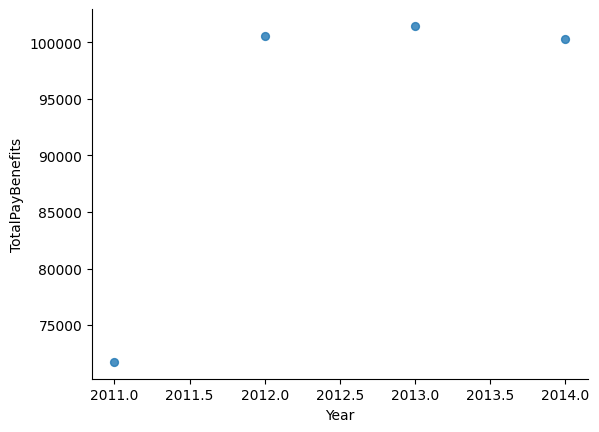

In [ ]:
# @title Year vs TotalPayBenefits

from matplotlib import pyplot as plt
average_pay_by_year.plot(kind='scatter', x='Year', y='TotalPayBenefits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# sql code

In [ ]:
select avg(TotalPayBenefits), Year from Salaries
GROUP by Year
ORDER by Year;

#### Q12: What is the total BasePay for each status (full-time, part-time,etc.)?


# PYTHON CODE

In [ ]:
sal.groupby('Status')['BasePay'].sum()

Status
FT    2.036280e+09
PT    5.010892e+08
Name: BasePay, dtype: float64

# sql code

In [ ]:
SELECT Status, SUM(BasePay) as TotalBasePay
FROM Salaries
GROUP BY Status
order by Status;

#### Q13: How many employees are there for each job title in each agency?


# PYTHON CODE

In [37]:
sal.groupby(['Agency','JobTitle']).size().reset_index(name='EmployeeCount')


,Agency,JobTitle,EmployeeCount
0,San Francisco,ACCOUNT CLERK,83
1,San Francisco,ACCOUNTANT,5
2,San Francisco,ACCOUNTANT INTERN,48
3,San Francisco,"ACPO,JuvP, Juv Prob (SFERS)",1
4,San Francisco,ACUPUNCTURIST,1
...,...,...,...
2154,San Francisco,X-RAY LABORATORY AIDE,26
2155,San Francisco,X-Ray Laboratory Aide,100
2156,San Francisco,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1
2157,San Francisco,Youth Comm Advisor,4


# sql code

In [ ]:
SELECT count (EmployeeName), JobTitle, Agency FROM Salaries
GROUP by EmployeeName

#### Q14: Which job title has the highest average Benefits?


# PYTHON CODE

In [ ]:
sal.groupby('JobTitle')['Benefits'].mean().sort_values(ascending=False).head(1)

JobTitle
Chief Investment Officer    96570.66
Name: Benefits, dtype: float64

# sql code

In [ ]:
select JobTitle , avg (Benefits)as ab from Salaries
GROUP by JobTitle
ORDER by JobTitle DESC
LIMIT 1 ;

#### Q15: What is the ratio of BasePay to TotalPayBenefits for each job title?


# PYTHON CODE

In [ ]:

def calculate_ratio(BasePay,TotalPayBenefits):
    return BasePay / TotalPayBenefits.replace(0, pd.NA)

sal['BasePay_TotalPayBenefits_Ratio'] = calculate_ratio(sal['BasePay'], sal['TotalPayBenefits'])
average_ratios = sal.groupby('JobTitle')['BasePay_TotalPayBenefits_Ratio'].mean()
print(average_ratios)


JobTitle
ACCOUNT CLERK                                      0.98449
ACCOUNTANT                                        0.787718
ACCOUNTANT INTERN                                 0.989457
ACPO,JuvP, Juv Prob (SFERS)                       0.776051
ACUPUNCTURIST                                     0.981951
                                                    ...   
X-RAY LABORATORY AIDE                              0.90955
X-Ray Laboratory Aide                              0.72661
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    0.980927
Youth Comm Advisor                                0.631575
ZOO CURATOR                                       0.647027
Name: BasePay_TotalPayBenefits_Ratio, Length: 2159, dtype: object


# sql code

In [ ]:
select sum(BasePay)/sum (TotalPayBenefits)as 'BaseTotalRatio',JobTitle from Salaries
GROUP by JobTitle
ORDER by JobTitle;

#### Q16: Which job title has the highest ratio of BasePay to TotalPayBenefits?


# PYTHON CODE

In [ ]:
highest_ratio_index = (sal['BasePay'] / sal['TotalPayBenefits']).idxmax()
sal.loc[highest_ratio_index,'JobTitle']

'EXECUTIVE CONTRACT EMPLOYEE'

# sql code

In [ ]:
select sum(BasePay)/sum (TotalPayBenefits)as 'BaseTotalRatio',JobTitle from Salaries
GROUP by JobTitle
ORDER by BaseTotalRatio DESC
LIMIT 1 ;

#### Q17: How many years of data are available in the dataset?


# PYTHON CODE

In [ ]:
sal['Year'].nunique()

4

# sql code

In [ ]:
SELECT count (DISTINCT year) from Salaries


#### Q18: What is the average BasePay for each year and job title combination?


# PYTHON CODE

In [ ]:
sal.groupby(['Year', 'JobTitle'])['BasePay'].mean().reset_index()

,Year,JobTitle,BasePay
0,2011,ACCOUNT CLERK,43300.806506
1,2011,ACCOUNTANT,46643.172000
2,2011,ACCOUNTANT INTERN,28732.663958
3,2011,ACUPUNCTURIST,66374.400000
4,2011,ADMINISTRATIVE ANALYST,63435.628602
...,...,...,...
4132,2014,Wire Rope Cable Maint Sprv,93904.720000
4133,2014,Worker's Comp Supervisor 1,54505.333333
4134,2014,Worker's Compensation Adjuster,69915.985385
4135,2014,X-Ray Laboratory Aide,45490.340286


# sql code

In [ ]:
SELECT Year, JobTitle, AVG(BasePay) as AverageBasePay
FROM Salaries
GROUP BY Year, JobTitle


#### Q19: How many employees have a TotalPayBenefits greater than $326373.19??


# PYTHON CODE

In [ ]:
(sal['TotalPayBenefits'] > 326373.19).sum()

144

# sql code

In [ ]:
SELECT COUNT(*)FROM Salaries
WHERE TotalPayBenefits > 326373.19

#### Q20: Which agency has the highest average TotalPayBenefits?


# PYTHON CODE

In [ ]:
sal['TotalPayBenefits'] = pd.to_numeric(sal['TotalPayBenefits'])
agency_with_highest_avg = sal.groupby('Agency')['TotalPayBenefits'].mean().idxmax()
HighestAvg=sal.groupby('Agency')['TotalPayBenefits'].mean().max()
print("The agency with the highest average is", agency_with_highest_avg, "with the highest avg TotalPayBenefits of :", HighestAvg)

The agency with the highest average is San Francisco with the highest avg TotalPayBenefits of : 93692.55481056681


# sql code

In [ ]:
select avg( TotalPayBenefits) ,Agency from Salaries
GROUP by Agency
order by agency DESC
limit 1 ;

 * **Data cleaning** *if needed*

In [ ]:
sal.info()
sal.drop(['Notes'], axis=1, inplace=True)
sal.reset_index(drop=True, inplace=True)#if needed

sal['Status'].fillna(sal['Status'].mean())

In [ ]:
sal['Status'].fillna('unknown', inplace = True)

In [ ]:
sal['Status']

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
148649         PT
148650    unknown
148651    unknown
148652    unknown
148653         PT
Name: Status, Length: 148654, dtype: object

In [ ]:
sal = sal[sal['Status'] != 'unknown']


In [ ]:
sal['Status']

110531    PT
110532    FT
110533    PT
110534    FT
110535    FT
          ..
148645    PT
148647    PT
148648    PT
148649    PT
148653    PT
Name: Status, Length: 38119, dtype: object